In [2]:
import optuna
import dill
from IPython.display import Image
import pandas as pd

It was a problem with imbalanced dataset, I tried some approaches like smote to deal with this, however the best solution was apply weights and some regularization.

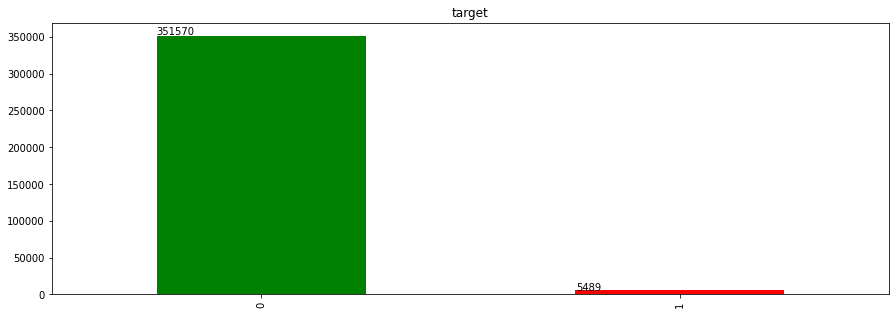

In [3]:
Image(filename='minor_target_red_1.png')

I decided to use lighgbm to build the model. During the process I created a nested cross-validation with optuna to test different hypterparamenters. The image bellow show 35 trials that was one trial by fold, in this case, K-fold = 5, so in total was 7 trial (35/5).

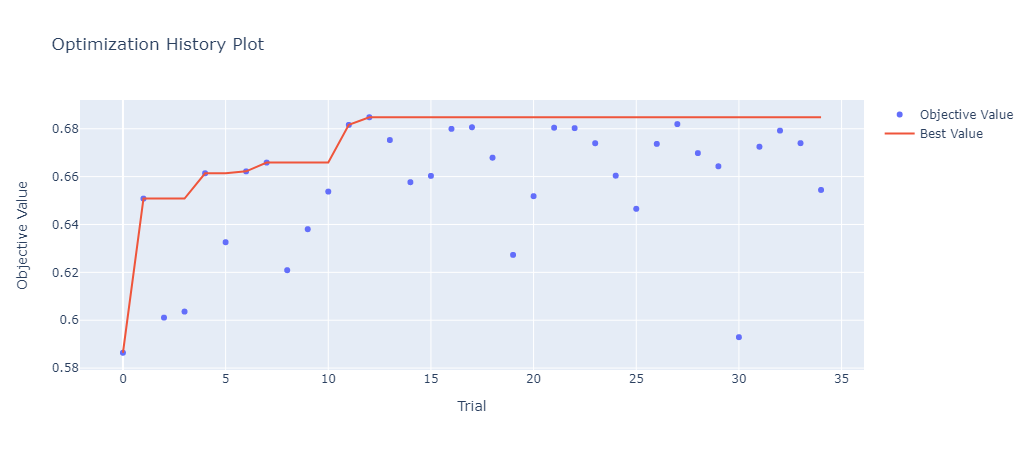

In [10]:
Image(filename='study_in.png')

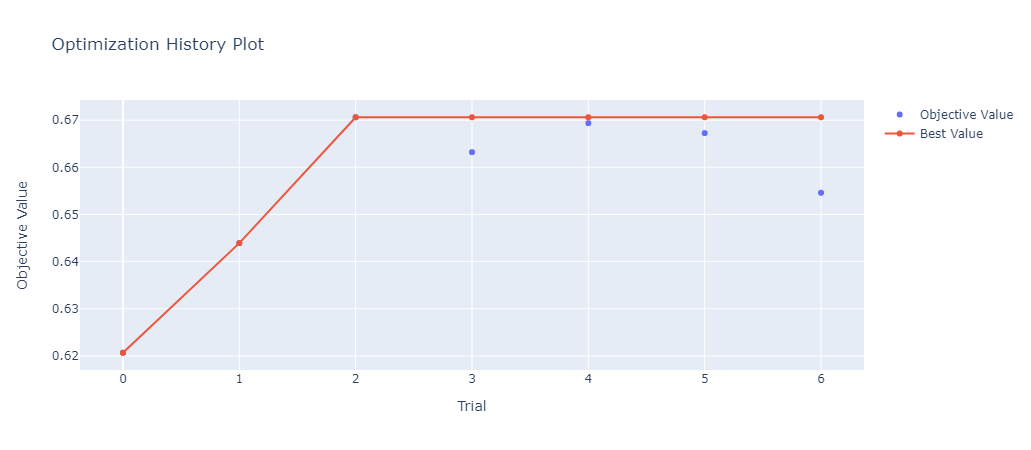

In [8]:
Image(filename='study_out.png')

I also tried to track of the importance of the features during each k fold, It was not the best solution, but it was useful to check new features, for example "temp_3_sin".

In [12]:
importance_df = pd.read_csv('importance_df.csv', index_col=0)
importance_df.groupby('feature_name')['importance_gain', 'importance_split'].mean().sort_values(by='importance_gain', ascending=False)[:10]

C:\Users\lucas\AppData\Local\Temp\ipykernel_2124\2890446674.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,importance_gain,importance_split
feature_name,,
cd_15_prep_2,135593.957161,2554.342857
regiao_4,129208.585965,2502.942857
cd_15_prep_3,118705.265967,1369.057143
cd_16_prep_2,113099.286670,2412.914286
temp_3_sin,102689.233927,1732.000000
cd_16_prep_6,101694.174364,1885.457143
cd_15_prep_6,99460.228286,1864.800000
dem_6,87018.837911,2019.600000
regiao_6,53554.429346,1999.257143


In [16]:
with open('0.66257-23-1aee46f994ee48cdaabc8b74ce6cdb13.pkl', 'rb') as f:
    model = dill.load(f)

This model achieved 0.66 on auc roc, it is the combination of 5 kfold, the pipeline has some custom transform to create new feature and I did not use any preprocessing step because I acquired better results this way.

In [20]:
model[0] # first fold

Pipeline(steps=[('create_features_1',
                 CreateFeaturesPrep(col_name=Index(['cd_1_prep_1', 'hist_7_prep_1', 'cd_14_prep_1', 'cd_17_prep_1',
       'cd_13_prep_1', 'hist_1_prep_1', 'regiao_26_prep_1', 'cd_16_prep_1',
       'regiao_27_prep_1', 'regiao_1_prep_1', 'cd_5_prep_1', 'hist_2_prep_1',
       'cd_15_prep_1', 'cd_2_prep_1', 'cd_4_prep_1', 'hist_6_prep_1',
       'cd_6_prep_1', 'hist_3_prep_...
                                bagging_freq=4, class_weight={0: 1, 1: 4},
                                device='gpu',
                                feature_fraction=0.9621188130564353,
                                lambda_l1=0.0008600285281358387,
                                lambda_l2=4.8618566540158925,
                                learning_rate=0.004255092990421003, max_bin=155,
                                max_depth=6, metric='auc', min_data_in_leaf=110,
                                n_estimators=1942, num_leaves=989,
                                num_threads=6, objective='binary',
                                path_smooth=16, random_state=42, verbose=1))])

The weights was one of the hyperparameter used to deal with the imbalanced dataset was weights. It is possible to see that the models gained a good performance with 4 to 8 for the class 1.

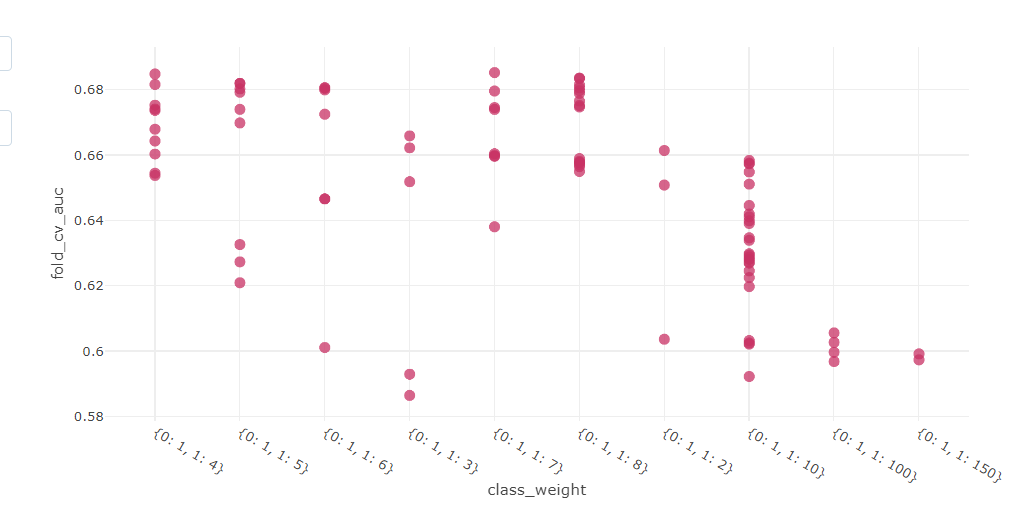

In [23]:
Image(filename='weights.png')

I used mlflow to track the models during the training that was useful.

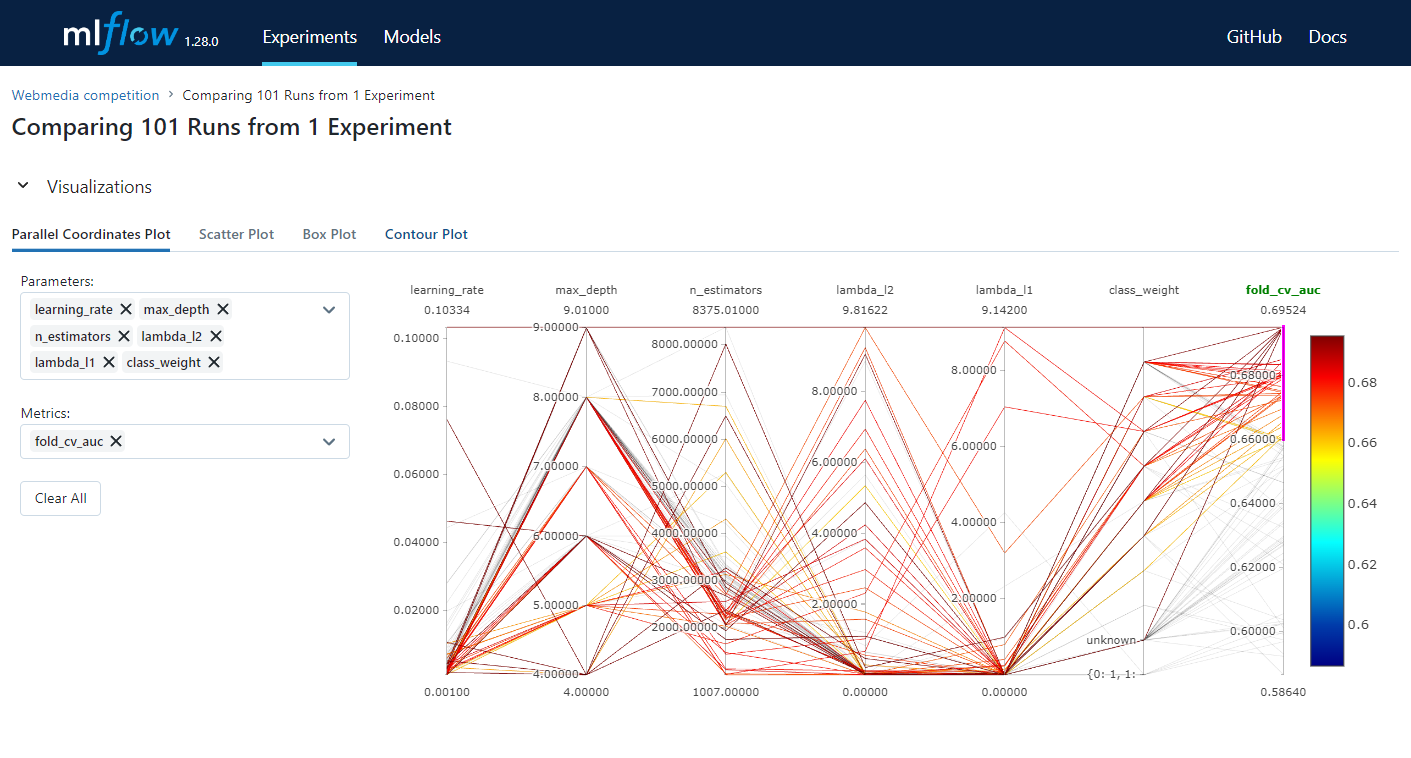

In [24]:
Image(filename='webmedia.png')

In the end, I did some ensembles with the lightgbm and logistic regression models trained with rapids.

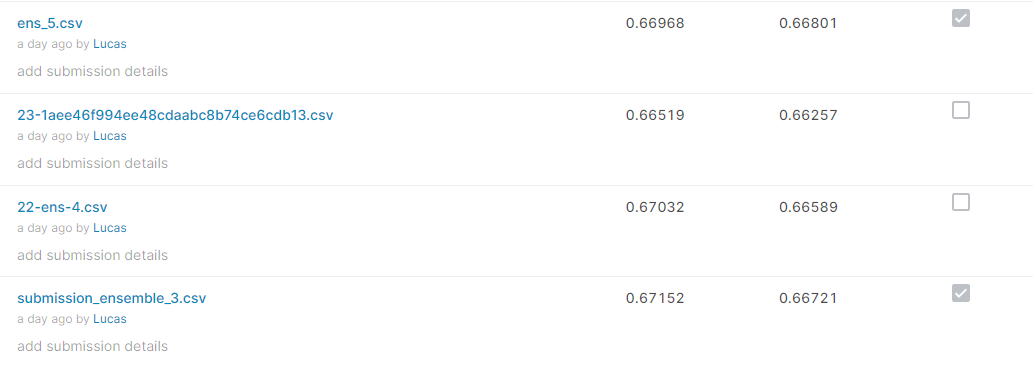

In [22]:
Image(filename='webmedia_submissions.png')

I achieved 5 position with 32 teams and 41 people, that was a small competition but I learned a lot.

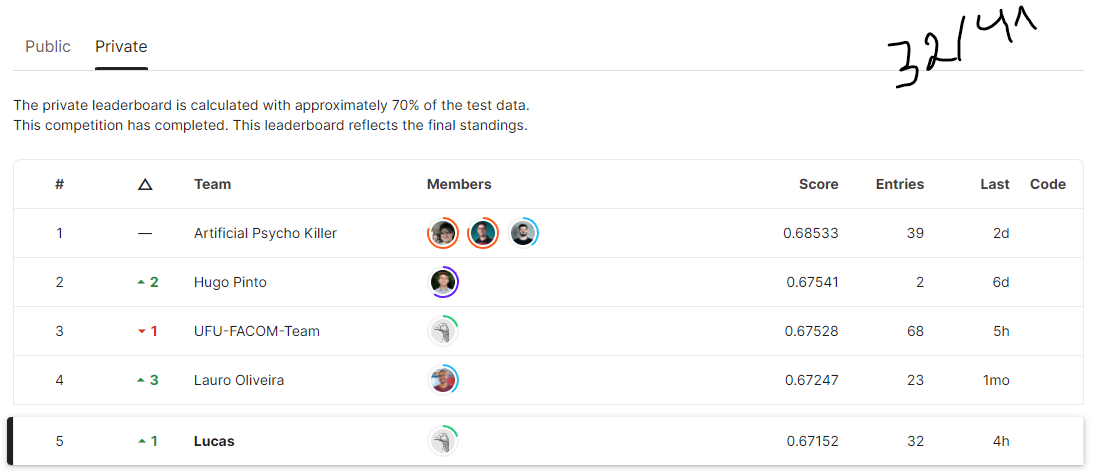

In [21]:
Image(filename='rank.png')

My conclusion
- I should use a stacking cross-validation, I wasted some models that could be usuful to improve the ensemble methods.
- Rapids was really fast, but I only started to use it on the last day with few hours to finish the competition.
- Dimension reduction could help to train more fast, I did some test with UMAP.